In [74]:
#분석 라이브러리 
import numpy as np
import pandas as pd

In [34]:
#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Seaborn 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [285]:
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules

In [5]:
df = pd.read_csv("C:/Users/student/Downloads/BreadBasket_DMS.csv")

In [193]:
df.head(5)

,Date,Time,Transaction,Item,datetime,day_of_week
0,2016-10-30,09:58:11,1,bread,2016-10-30 09:58:11,Sunday
1,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,Sunday
2,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,Sunday
3,2016-10-30,10:07:57,3,hot chocolate,2016-10-30 10:07:57,Sunday
4,2016-10-30,10:07:57,3,jam,2016-10-30 10:07:57,Sunday


In [194]:
df['Item'] = df['Item'].str.lower() # 편하게 확인하기 위해 대문자를 소문자로 바꿔줌

In [195]:
x=df['Item'] == 'none' # 결측치 확인
print(x.value_counts()) # 786개의 결측치를 확인

False    20507
Name: Item, dtype: int64


In [196]:
df=df.drop(df[df.Item == 'none'].index)

In [197]:
df['Item'].unique() # Item 종류 확인

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'tartine',
       'basket', 'mineral water', 'farm house', 'fudge', 'juice',
       "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pintxos', 

In [198]:
len(df['Item'].unique()) # Item의 개수 확인

94

In [199]:
top_10_seller=df['Item'].value_counts().head(10) # 제일 많이 팔린 10개의 아이템 확인
top_10_seller

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
Name: Item, dtype: int64

In [200]:
print(type(top_10_seller)) # 시리즈로 저장이 되어있다
top_10_seller.index # 시리즈 인덱스

<class 'pandas.core.series.Series'>


Index(['coffee', 'bread', 'tea', 'cake', 'pastry', 'sandwich', 'medialuna',
       'hot chocolate', 'cookies', 'brownie'],
      dtype='object')

In [201]:
top_10_seller.values # 시리즈 값

array([5471, 3325, 1435, 1025,  856,  771,  616,  590,  540,  379],
      dtype=int64)

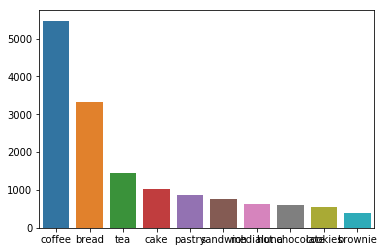

In [202]:
sns.barplot(x=top_10_seller.index, y=top_10_seller.values, data=df) # 시각화

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 6 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
datetime       20507 non-null datetime64[ns]
day_of_week    20507 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.1+ MB


In [204]:
df['datetime'] = pd.to_datetime(df['Date']+' '+ df['Time']) #일자와 시간을 합치고

In [205]:
df['day_of_week'] = df['datetime'].dt.day_name() # 요일 표시

In [206]:
total_items_by_weekday = df['day_of_week'].value_counts() # 언제 제일 많이 샀는지 확인
total_items_by_weekday

Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: day_of_week, dtype: int64

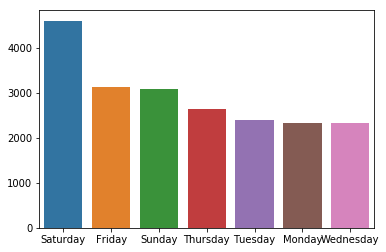

In [207]:
sns.barplot(x=total_items_by_weekday.index, y=total_items_by_weekday.values, data=df) # 시각화

In [222]:
x=pd.to_datetime(df['Time']) #Time 데이터 type object -> datetime64 변환
sell_time = x.dt.hour.value_counts() # 어느 시간에 가장 많이 샀는지 확인
sell_time

11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      48
7       24
20      22
22       8
23       3
21       3
1        1
Name: Time, dtype: int64

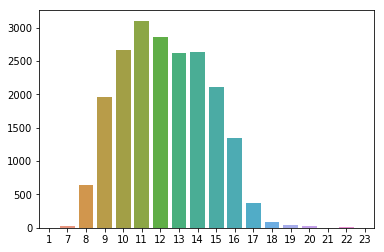

In [223]:
sns.barplot(x=sell_time.index, y=sell_time.values, data=df) # 시각화

In [319]:
basket = df.groupby(['Transaction', 'Item'])['Item'].sum().unstack().fillna(0)
print(basket.head())

Item        adjustment afternoon with the baker alfajores argentina night  \
Transaction                                                                 
1                    0                        0         0               0   
2                    0                        0         0               0   
3                    0                        0         0               0   
4                    0                        0         0               0   
5                    0                        0         0               0   

Item        art tray bacon baguette bakewell bare popcorn basket  \
Transaction                                                        
1                  0     0        0        0            0      0   
2                  0     0        0        0            0      0   
3                  0     0        0        0            0      0   
4                  0     0        0        0            0      0   
5                  0     0        0        0        

In [321]:
frequent_itemsets = apriori(basket_sets,min_support=0.02,  use_colnames=True)
print(frequent_itemsets)

     support                 itemsets
0   0.036344              (alfajores)
1   0.327205                  (bread)
2   0.040042                (brownie)
3   0.103856                   (cake)
4   0.478394                 (coffee)
5   0.054411                (cookies)
6   0.039197             (farm house)
7   0.058320          (hot chocolate)
8   0.038563                  (juice)
9   0.061807              (medialuna)
10  0.038457                 (muffin)
11  0.086107                 (pastry)
12  0.071844               (sandwich)
13  0.029054           (scandinavian)
14  0.034548                  (scone)
15  0.034443                   (soup)
16  0.142631                    (tea)
17  0.033597                  (toast)
18  0.020285               (truffles)
19  0.023349            (bread, cake)
20  0.090016          (coffee, bread)
21  0.029160          (pastry, bread)
22  0.028104             (tea, bread)
23  0.054728           (coffee, cake)
24  0.023772              (tea, cake)
25  0.028209

In [325]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
1,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
2,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
4,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,(coffee),(cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
7,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
8,(coffee),(hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
9,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


결론적으로 향상도가 1 이상 되는 값이 없어서 각각 독립관계인것을 확인할수 있다